# Introduction

Facebook advertising is one of the biggest platforms that allows organizations to reach out to their consumers online. Whether the organization's objectives are to increase the traffic to their web property, generate leads, brand awareness or sell more products, Facebook Ad Campaigns are part of every social media strategy. The platform has features to define the target audience based on their location, age, gender, language , behaviour, connections or interest.

This analysis provides insights based on the current defined KPI's of an organization, which in this case is to improve conversion through their website. The purpose of the analysis is also to extract neccessary knowledge from the collected data set to see the underperforming facebook campaigns, explore possibilities to reduce spent and improve conversion and finally create a predictive model to automate facebook ad placement for the next quarter.

# Table of Contents

1. Introduction

2. About the Data Set

3. Data Collection 

4. Data Wrangling

5. Data Exploration

6. Model Development

7. Model Evaluation

8. Conclusion

# About the Data Set

The description of each variables within the data set are defined below;

-  ad_id: unique ID for each ad.

-  xyz_campaign: an ID associated with each ad campaign of XYZ.

-  fb_campaign_id: an ID associated with how Facebook tracks each campaign.

-  age: age of the person to whom the ad is shown.

-  gender: gender of the person to whom the ad is shown.

-  interest: a code specifying the categorty to which the person's interest belongs (interests are as mentioned in the person's Facebook public profile) 

-  Impressions: the number of times the ad was shown.

-  Clicks: Number of clicks on for that ad.

-  Spent: Amount paid by company xyz to Facebook, to show that ad.

-  Total conversion: Total number of people who enquired about the product after seeing the ad.

-  Approved conversion: Total number of people who bought the product after seeing the ad.

# Data Collection

In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np

In [2]:
# import the data set and create the data frame

fb_ads=pd.read_csv('fb_conversion_data.csv')
fb_ads.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
# review to see if there are any missing data
missing_data=fb_ads.isnull()
missing_data.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False


In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

ad_id
False    1143
Name: ad_id, dtype: int64

xyz_campaign_id
False    1143
Name: xyz_campaign_id, dtype: int64

fb_campaign_id
False    1143
Name: fb_campaign_id, dtype: int64

age
False    1143
Name: age, dtype: int64

gender
False    1143
Name: gender, dtype: int64

interest
False    1143
Name: interest, dtype: int64

Impressions
False    1143
Name: Impressions, dtype: int64

Clicks
False    1143
Name: Clicks, dtype: int64

Spent
False    1143
Name: Spent, dtype: int64

Total_Conversion
False    1143
Name: Total_Conversion, dtype: int64

Approved_Conversion
False    1143
Name: Approved_Conversion, dtype: int64



There are no missing data in our data set.

In [5]:
# review the data types
fb_ads.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

All data variables are numeric except age and gender are objects. The age variable values are defined as ages between two numbers rather than average number. Gender variable is also not numerical datatype. For future analysis and model development, it will be required to convert these variables to numeric data type.

In [6]:
# review full information on the data set
fb_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.3+ KB


In [8]:
fb_ads.shape

(1143, 11)

The data set consists of 1143 rows and 11 columns.

In [9]:
fb_ads.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

Based on the imported data, very minor data wrangling is required. 

-  Average the grouped age and convert the data type to numeric.

-  Convert Gender variable M being 0 and F being 1 numeric variable.

# Data Wrangling

In [12]:
# Review the age and gender distribution briefly

age_count= fb_ads['age'].value_counts()
age_count= age_count.to_frame()

In [13]:
age_count.head()

,age
30-34,426
45-49,259
35-39,248
40-44,210


In [14]:
# rename column to age count and index age
age_count.rename(columns={'age': 'Age Count'}, inplace=True)
age_count.index.name='Age'
age_count.head(5)

,Age Count
Age,
30-34,426
45-49,259
35-39,248
40-44,210


In [15]:
# visualize the age count
# import neccessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

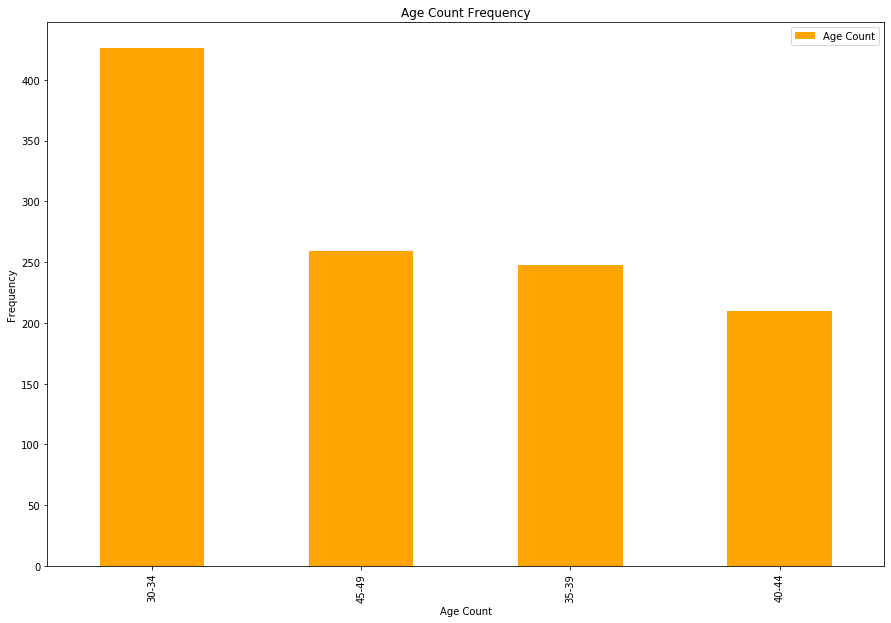

In [16]:
age_count.plot(kind='bar',
              figsize=(15,10),
              color='orange')

plt.title('Age Count Frequency')
plt.xlabel('Age Count')
plt.ylabel('Frequency')

plt.show()

Organization's Facebook Ad Campaigns targets consumers ages between 30-34 years old followed by 45-49, 35-39 and 40-44 years of age.

In [17]:
# similarly review the gender distribution
gender_count=fb_ads['gender'].value_counts()
gender_count=gender_count.to_frame()
gender_count.rename(columns={'gender': 'Gender Count'}, inplace=True)
gender_count.index.name='Gender Count'
gender_count.head(5)

,Gender Count
Gender Count,
M,592
F,551


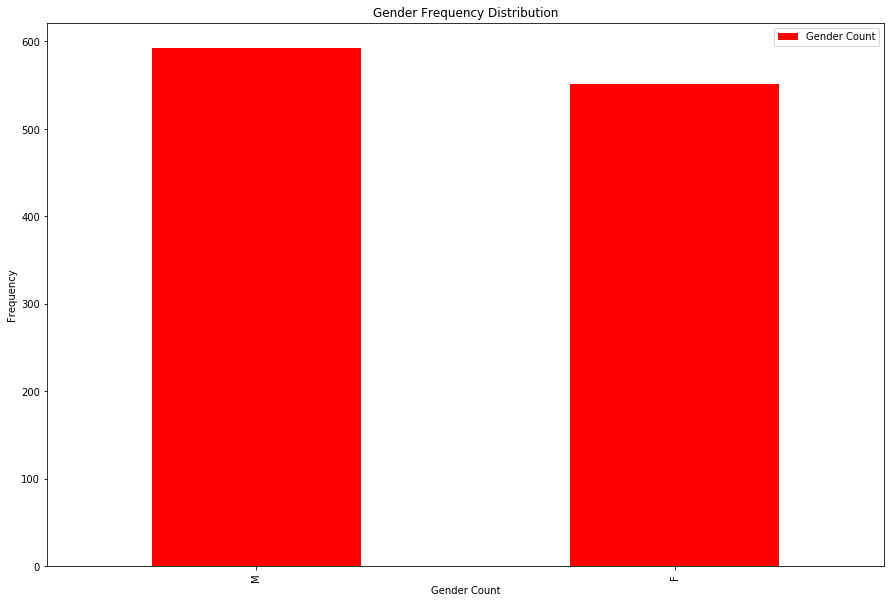

In [18]:
# visualize gender count
gender_count.plot(kind='bar', figsize=(15,10), color='red')

plt.title('Gender Frequency Distribution')
plt.xlabel('Gender Count')
plt.ylabel('Frequency')

plt.show()

Organization's Facebook Ad Campaigns target more male audience than female audience.

In [21]:
# Convert Age to average age and numeric variable
fb_ads['age'][fb_ads['age']=='30-34']=32
fb_ads['age'][fb_ads['age']=='35-39']=37
fb_ads['age'][fb_ads['age']=='40-44']=42
fb_ads['age'][fb_ads['age']=='45-49']=47
fb_ads[['age']]=fb_ads[['age']].astype('int')

C:\Users\Anil Akyildirim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anil Akyildirim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anil Akyildirim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

In [22]:
# convert Gender to 0 and 1 values and numeric variable
fb_ads['gender'][fb_ads['gender']=='M']=0
fb_ads['gender'][fb_ads['gender']=='F']=1
fb_ads[['gender']]=fb_ads[['gender']].astype('int')

C:\Users\Anil Akyildirim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anil Akyildirim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
fb_ads.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,32,0,15,7350,1,1.43,2,1
1,708749,916,103917,32,0,16,17861,2,1.82,2,0
2,708771,916,103920,32,0,20,693,0,0.00,1,0
3,708815,916,103928,32,0,28,4259,1,1.25,1,0
4,708818,916,103928,32,0,28,4133,1,1.29,1,1


In [24]:
fb_ads.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                      int32
gender                   int32
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

All variables are within the dataset are numeric and ready for data exploration.

# Data Exploration

In [27]:
fb_ads['age'].unique()
fb_ads['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106], dtype=int64)

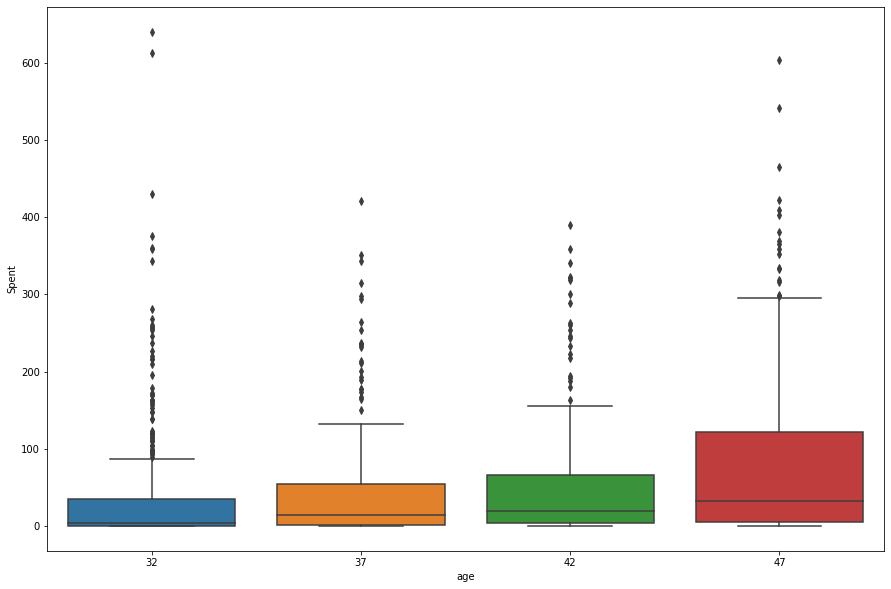

In [35]:
### Review the Spent distribution on gender

plt.figure(figsize=(15,10))
sns.boxplot(x='age', y='Spent', data=fb_ads)

plt.show()

There are many outliers in the 30-34 years old age group, this can explain the fact that, even though the majority of the organization's Facebook Ads are targeting the age group between 30-34 years old, the organization is spending the most for the 45-49 age group. 

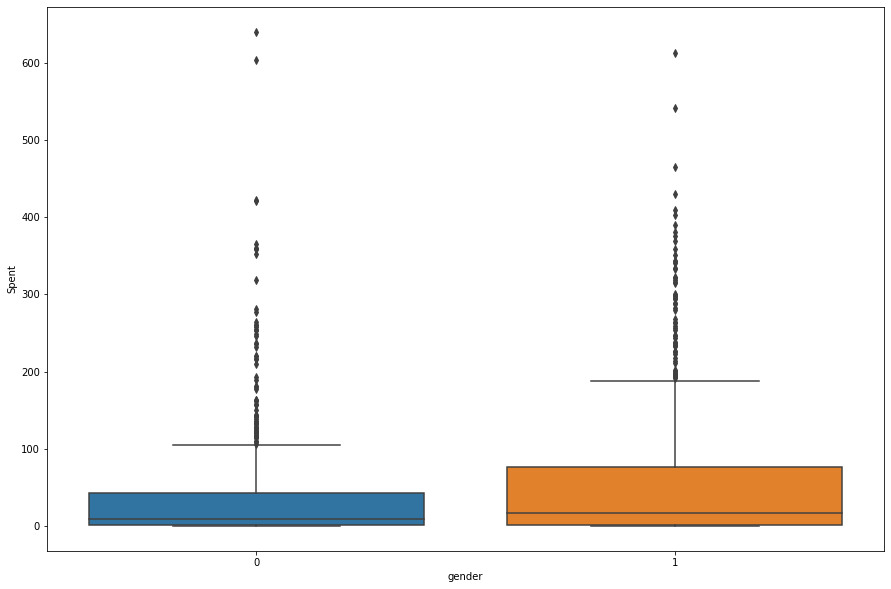

In [34]:
# Review the Spent distribution on Gender
plt.figure(figsize=(15,10))
sns.boxplot(x='gender', y='Spent', data=fb_ads)

plt.show()

Similar to the age group, even though the majority of the facebook ads are targeting males, the organization is spending most of their facebook adverstising budget on females.

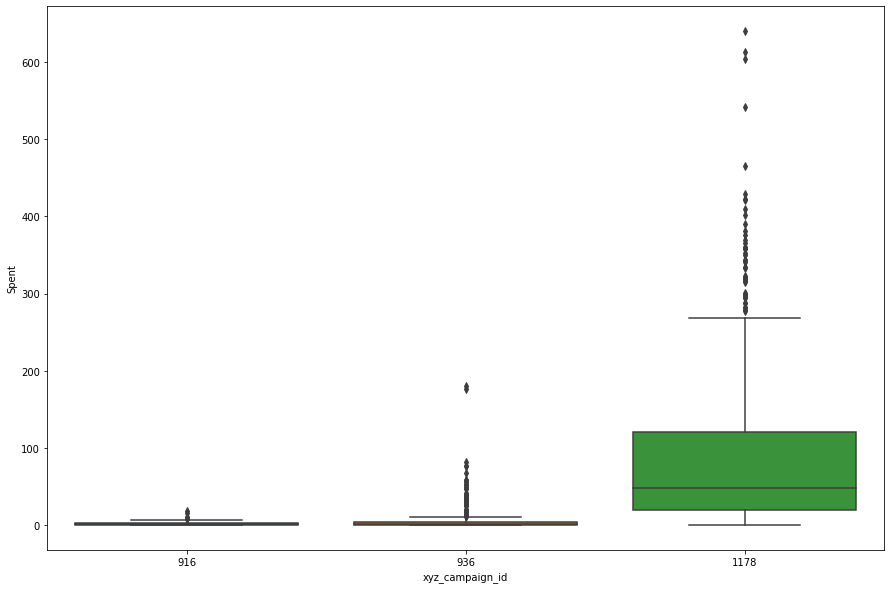

In [36]:
# Review the Spent distribution on specific campaigns
plt.figure(figsize=(15,10))
sns.boxplot(x='xyz_campaign_id', y='Spent', data=fb_ads)

plt.show()

Organization is spending significant amount of their budget on Campaign 1178. Further exploration of this specific campaign will provide more insights on the overall Facebook Ad Placement of the organization.

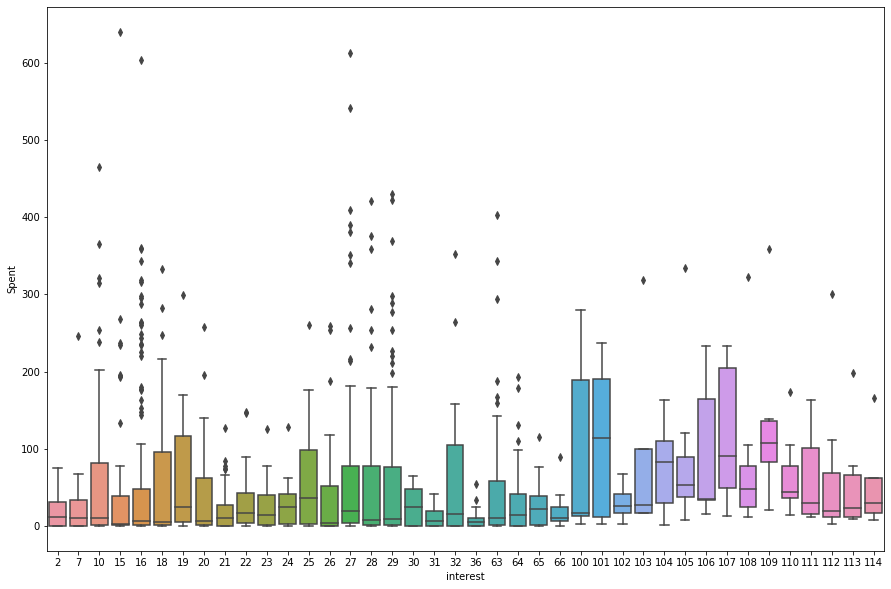

In [37]:
# Review the Spent distribution on interests.
plt.figure(figsize=(15,10))
sns.boxplot(x='interest', y='Spent', data=fb_ads)

plt.show()


There are a lot of outliers on interest 16 and 10. Even though majority of the spent is on interest 100, 101 and 107, the overall Facebook Ad Budget allocation is distributed evenly. The review of the outliers on interest 16, 27, 28 and 29 would benefit the next quarter Facebook Ad Placement of the organization.

The data set collected from Organization's Facebook Advertising Platform, provides important variables such as Impressions, Clicks, Spent, Total Conversion and Approved Conversion, however there are other standard engagement and conversion metrics such as Click Through Rate (CTR) which is the percentage of how many impressions become clicks, Conversion Rate(CR), which is the percentage of clicks that results in conversion, Cost Per Click(CPC), which is cost of each consumer click. 

In order to improve the insights from the dataset, these features can be added to the dataframe.

In [39]:
# Creating CTR and CPC as new feautures and adding them to the dataframe

fb_ads['CTR']=(fb_ads['Clicks']/fb_ads['Impressions'])*100
fb_ads['CPC']=fb_ads['Spent']/fb_ads['Clicks']

In [40]:
fb_ads.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,32,0,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,32,0,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,32,0,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,32,0,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,32,0,28,4133,1,1.29,1,1,0.024195,1.29


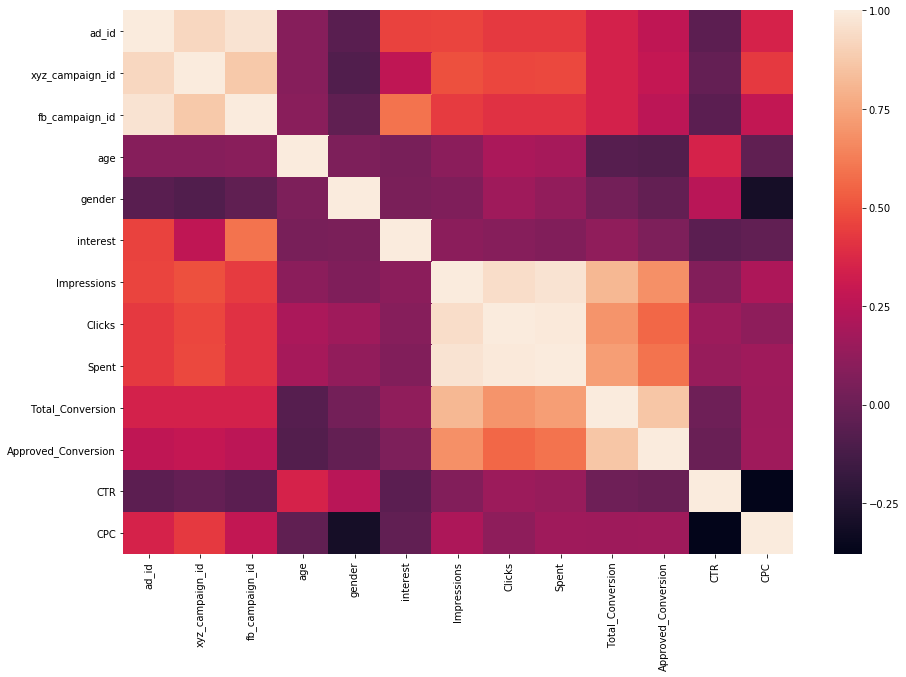

In [42]:
# Review of overall correlation between variables

plt.figure(figsize=(15,10))
sns.heatmap(fb_ads.corr())

plt.show()

The strongest correlation are between Impressions, Clicks, Spent, Total_Conversion and Approved Conversion. 

In [43]:
# detail correlation between Impressions and Clicks

fb_ads[['Impressions', 'Clicks']].corr()

,Impressions,Clicks
Impressions,1.000000,0.948514
Clicks,0.948514,1.000000


(0, 624.3246025312726)

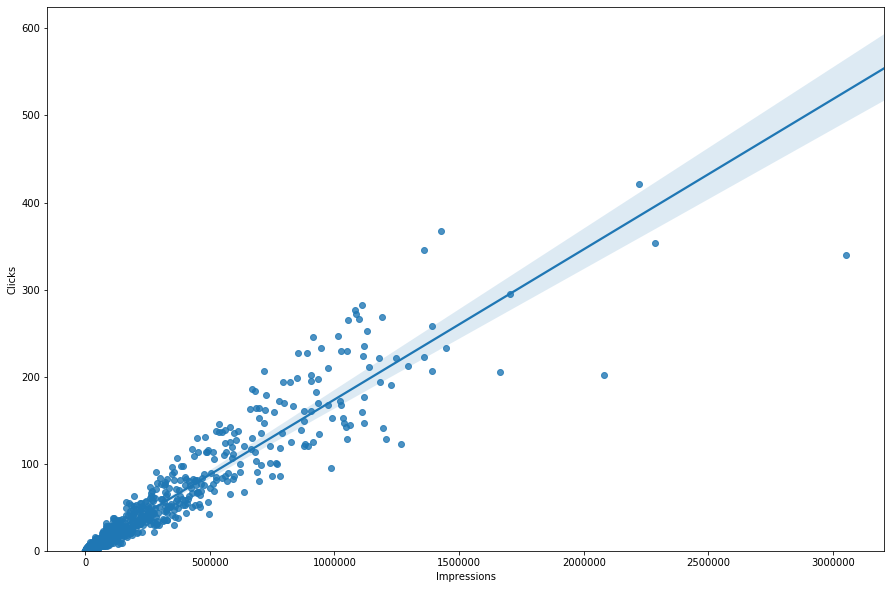

In [45]:
plt.figure(figsize=(15,10))
sns.regplot(x='Impressions', y='Clicks', data=fb_ads)
plt.ylim(0,)

In [46]:
# look at pearson correlation and pvalue
# import neccesary library
from scipy import stats

In [48]:
pearson_1, p_value_1 = stats.pearsonr(fb_ads['Impressions'], fb_ads['Clicks'])
print(pearson_1);
print(p_value_1)

0.9485141361540012
0.0


The correlation between Impressions and Clicks are expected as the more Facebook Ads of a campaign displayed the more users will click on the ads however the correlation is also significant and linear relationship is strong.

In [51]:
# detail correlation between Clicks and Spent

fb_ads[['Spent', 'Clicks']].corr()

,Spent,Clicks
Spent,1.000000,0.992906
Clicks,0.992906,1.000000


(0, 470.3903788867277)

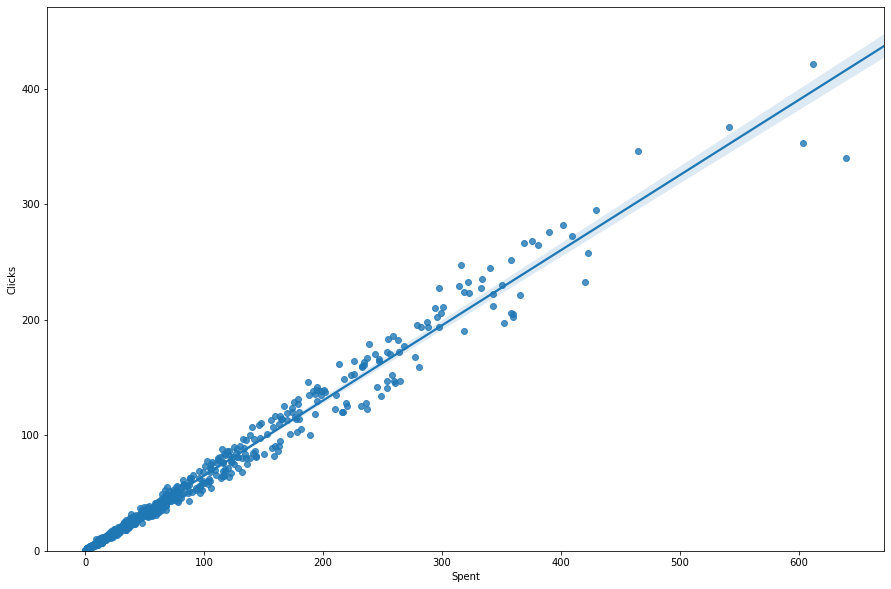

In [52]:
plt.figure(figsize=(15,10))
sns.regplot(x='Spent', y='Clicks', data=fb_ads)
plt.ylim(0,)

Similar to Impressions and Clicks correlation, Clicks and Spent has a strong linear relationship and significant correlation.

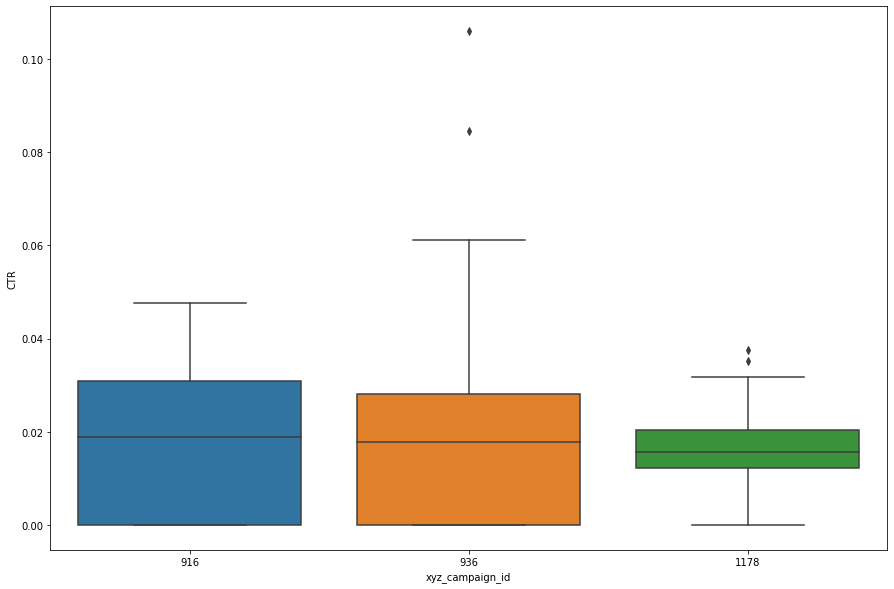

In [57]:
# detail distribution of Campaign and CTR

plt.figure(figsize=(15,10))
sns.boxplot(x='xyz_campaign_id', y='CTR', data=fb_ads)
plt.show()

The earlier analysis showed that the organization is spending majority of their facebook advertising budget on Campaign 1178, Further exploring the distribution of campaign for Click Through Rate, it is evident that campaign 916 and 936 have better consumer engagement. Even though the amount of facebook ads being served to the users for campaign 1178 is much higher than campaign 916 and 936, the engagement is much lower.

In [59]:
# filter campaign 1178 data and review in detail

is_1178=fb_ads['xyz_campaign_id']==1178
campaign_1178=fb_ads[is_1178]
campaign_1178.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
518,1121091,1178,144531,32,0,10,1194718,141,254.049996,28,14,0.011802,1.801773
519,1121092,1178,144531,32,0,10,637648,67,122.400000,13,5,0.010507,1.826866
520,1121094,1178,144531,32,0,10,24362,0,0.000000,1,1,0.000000,NaN
521,1121095,1178,144531,32,0,10,459690,50,86.330001,5,2,0.010877,1.726600
522,1121096,1178,144531,32,0,10,750060,86,161.909999,11,2,0.011466,1.882674


In [62]:
# review the correlation between Spent and CTR on Campaign 1178
campaign_1178[['Spent', 'CTR']].corr()

,Spent,CTR
Spent,1.000000,0.354103
CTR,0.354103,1.000000


(0, 673.8930357553783)

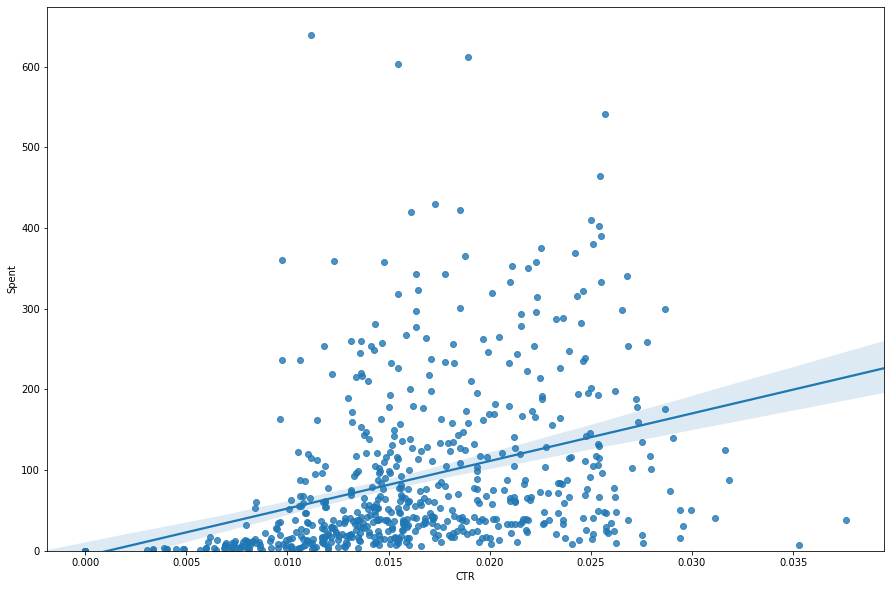

In [66]:
plt.figure(figsize=(15,10))
sns.regplot(x='CTR', y='Spent', data=campaign_1178)
plt.ylim(0,)

There is a positive linear relationship between Spent and Click Through Rate. This is expected as organization is spending their facebook budget on campaign 1178 and there should be clicks for this campaign ad. However the correlation is weak and should be much more stronger considering the other campaign ads(916 and 936). Another important fact to note is that, there is an organic engagement to this particular campaign. 

Based on the data analysis, the features that can help create a predictive model are, Impressions, Clicks, Spent, Total Conversion, Approved Conversion, CTR and CPC. The objective of the organization is not only improve conversion in terms of sales but also to improve awareness. Hence, the target feature for the predictive model will be Total Conversion.

# Model Development

The model foundation that is chosen for this particular predictive model is Decision Tree. Within the different decision tree libraries, the predictive model leverages Random Forest as to define the most efficient depth of the branches.

In [94]:
# select feature set X

X = fb_ads[['Impressions', 'Clicks', 'Spent', 'CTR']]
X.head(5)

,Impressions,Clicks,Spent,CTR
0,7350,1,1.43,0.013605
1,17861,2,1.82,0.011198
2,693,0,0.00,0.000000
3,4259,1,1.25,0.023480
4,4133,1,1.29,0.024195


In [118]:
# select target feature y

y=fb_ads[['Total_Conversion']]
y.head(5)

,Total_Conversion
0,2
1,2
2,1
3,1
4,1


In [119]:
# create training and test data and split the feature set data
# import neccessary libraries
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=1)

In [168]:
X_train.head(5)

,Impressions,Clicks,Spent,CTR
578,297452,30,52.020000,0.010086
844,670608,130,195.149998,0.019385
50,11199,4,5.730000,0.035717
795,179950,35,58.680000,0.019450
653,220581,31,57.370000,0.014054


In [169]:
y_train.head(5)

,Total_Conversion
578,4
844,11
50,1
795,1
653,1


In [170]:
X_train.isnull().sum()

Impressions    0
Clicks         0
Spent          0
CTR            0
dtype: int64

In [171]:
y_train.isnull().sum()

Total_Conversion    0
dtype: int64

In [172]:
# create the model with Random Forest
# import neccessary libraries
from sklearn.ensemble import RandomForestRegressor

In [173]:
fb_ads_model=RandomForestRegressor(random_state=1)
fb_ads_model.fit(X_train, y_train)

C:\Users\Anil Akyildirim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anil Akyildirim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [174]:
# create prediction with the model
fb_ads_pred=fb_ads_model.predict(X_test)

In [175]:
print(fb_ads_pred[0:5])

[ 1.   1.   1.6  8.3 11.4]


In [176]:
print(y_test[0:5])

      Total_Conversion
314                  1
698                  1
846                  3
1136                13
1097                20


# Conclusion

From a broad overview of the data, it is clear that the organization is targeting consumers that are between 30-34 years old the most. There are more male audience is being targeted in the total amount of Facebook Ads. However, they are spending the most of their facebook campaign ad budget on the consumers that are between 45-49 years old and female audience. Based on this finding, revisit of the current consumer personas for the business is recommended.

It is also clear that the more business spends on facebook ad campaigns the higher the conversions are. Campaign 1178 gets the most Spent within the Facebook Campaign Ads, however gets the least amount of engagement. Overall spent for the interest categories are distributed evenly with interest 100, 101, 107 getting the maximum spent. Based on these findigs, revisit to campaign creative, strategy of Campaign 1178 and review of Facebook Ad Placements on interest 16,27,28 and 29 (which has the highest outliers) is strongly recommended.

The more the business spent, the more the engagement is for all campaigns, however the correlation and positive linear relationship is weak. Based on thos analysis, revisit of the spent distribution between campaigns are recommended.

In regards to the predictive model that is developed; It is certainly required to further evaluate the model and make neccessary adjustments for the quarter.